<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/svm_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

data = {
  "x1": [3.9, 4.0, 3.1, 3.5, 4.1, 3.8, 3.2, 4.5, 1.0, 1.1, 1.3, 1.5, 1.6, 1.7, 0.8, 1.1], #  3.8],
  "x2": [2.9, 3.0, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 1.9, 1.7, 1.6, 1.3, 1.2, 0.9, 1.1, 1.2], #  2.3],
  "y" : [1,   1,   1,   1,   1,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0, ]  #0]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

     x1   x2  y
0   3.9  2.9  1
1   4.0  3.0  1
2   3.1  2.0  1
3   3.5  2.1  1
4   4.1  2.2  1
5   3.8  2.3  1
6   3.2  2.4  1
7   4.5  2.5  1
8   1.0  1.9  0
9   1.1  1.7  0
10  1.3  1.6  0
11  1.5  1.3  0
12  1.6  1.2  0
13  1.7  0.9  0
14  0.8  1.1  0
15  1.1  1.2  0


In [39]:
df['y'].value_counts()

,count
y,
1,8
0,8


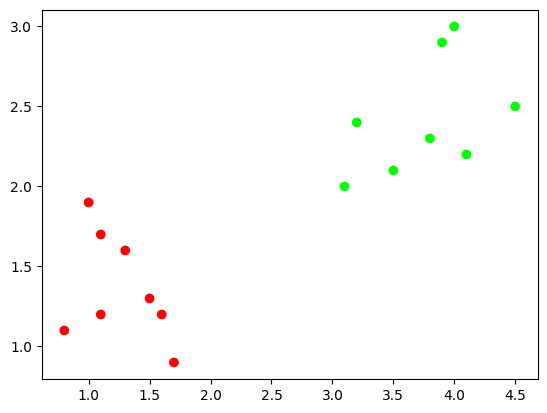

In [40]:
import matplotlib.pyplot as plt

# define custom color map
from matplotlib.colors import ListedColormap
cmap = ListedColormap([[1,0,0], [0,1,0]])

# use plt.scatter for color bar customization
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap=cmap)

In [41]:
X_train = df[['x1','x2']]
y_train = df['y']

In [42]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:
y_pred = clf.predict(X_train)

In [44]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


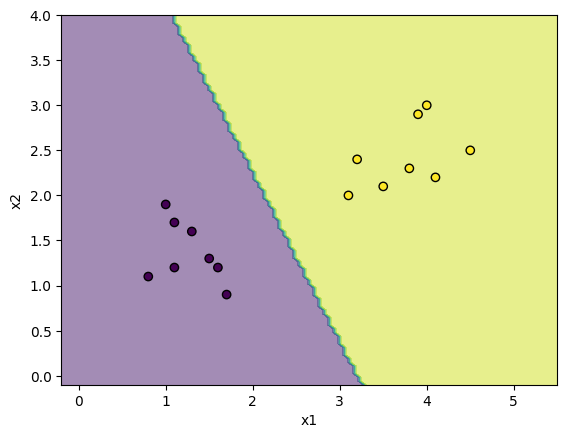

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train, response_method="predict",
    xlabel="x1", ylabel="x2",
    alpha=0.5,
)
disp.ax_.scatter(df['x1'], df['x2'], c=df['y'], edgecolor="k")
plt.show()

In [10]:
from sklearn.datasets import make_circles
X,Y=make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


In [18]:
data = {
  "x1": X[:,0],
  "x2": X[:,1],
  "y" : Y,
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

           x1        x2  y
0    0.363255 -0.673310  1
1   -0.670033  0.725677  0
2   -0.038300  1.016382  0
3    0.098753 -0.977237  0
4   -0.149709  0.979836  0
..        ...       ... ..
495  0.483048  0.856993  0
496 -0.807696  0.592096  0
497  0.402116 -0.724355  1
498 -0.294858 -0.922953  0
499 -0.764541 -0.183461  1

[500 rows x 3 columns]


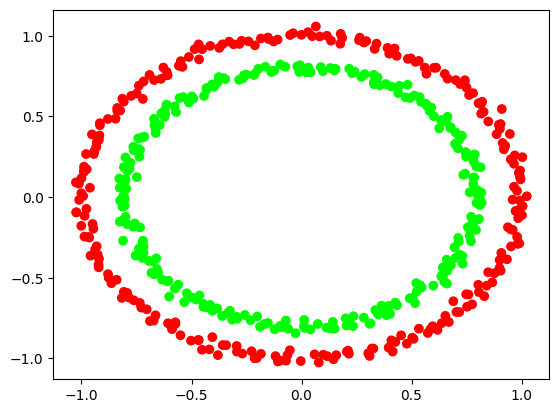

In [19]:
plt.scatter(df['x1'], df['x2'], c=df['y'], cmap=cmap)

In [20]:
X_train = df[['x1','x2']]
y_train = df['y']

In [21]:
clf2 = svm.SVC(kernel='rbf') # rbf Kernel, essentially gaussian
clf2.fit(X_train, y_train)

SVC()

In [23]:
y_pred2 = clf2.predict(X_train)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred2))

Accuracy: 1.0


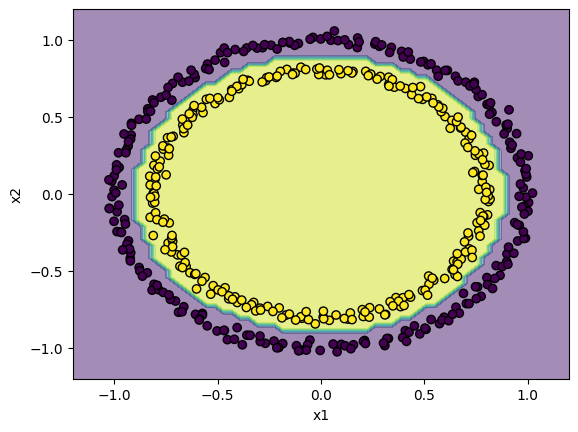

In [27]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf2, X_train, response_method="predict",
    xlabel="x1", ylabel="x2",
    alpha=0.5,
)
disp.ax_.scatter(df['x1'], df['x2'], c=df['y'], edgecolor="k")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()